In [154]:
!pip install psycopg2

In [155]:
import matplotlib.pyplot as plt
import pandas as pd


from sqlalchemy import create_engine
import psycopg2


In [156]:
from sqlalchemy import create_engine

In [157]:
# Create Engine
from sqlalchemy import create_engine
engine = create_engine('postgresql://postgres:@postgres@localhost:5432/employee_db')
connection = engine.connect()
## postgres - write the userrname
# @postgres - write the password

In [158]:
salary_data = pd.read_sql("SELECT * FROM salaries", connection)
salary_data.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [159]:
### Import the Titles table
title_data = pd.read_sql("SELECT * FROM title", connection)
title_data.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [160]:
title =title_data.rename(columns= {'title_id': 'emp_title_id'})
title

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [161]:
employee_data = pd.read_sql("SELECT * FROM employees", connection)
employee_data.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [162]:
#### Create a merged dataframe of titles and salaries
employee_title = title.merge(employee_data, on='emp_title_id')
employee_title

,emp_title_id,title,emp_no,birth_date,first_name,last_name,sex,hire_date
0,s0001,Staff,473302,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,s0001,Staff,421786,1957-09-28,Xiong,Verhoeff,M,1987-11-26
2,s0001,Staff,273487,1957-04-14,Christoph,Parfitt,M,1991-06-28
3,s0001,Staff,246449,1958-03-23,Subbu,Bultermann,F,1988-03-25
4,s0001,Staff,48085,1964-01-19,Venkatesan,Gilg,M,1993-06-28
...,...,...,...,...,...,...,...,...
300019,m0001,Manager,111400,1959-11-09,Arie,Staelin,M,1985-01-01
300020,m0001,Manager,111133,1955-03-16,Hauke,Zhang,M,1986-12-30
300021,m0001,Manager,110085,1959-10-28,Ebru,Alpin,M,1985-01-01
300022,m0001,Manager,110386,1953-10-04,Shem,Kieras,M,1988-10-14


In [163]:
#### Create a merged dataframe of titles and salaries
employee_salary = salary_data.merge(employee_title, on='emp_no')
employee_salary

,emp_no,salary,emp_title_id,title,birth_date,first_name,last_name,sex,hire_date
0,10001,60117,e0003,Senior Engineer,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,65828,s0001,Staff,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,40006,e0003,Senior Engineer,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,40054,e0003,Senior Engineer,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,78228,s0001,Staff,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...,...,...,...
300019,499995,40000,e0002,Engineer,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,58058,e0003,Senior Engineer,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,49597,e0003,Senior Engineer,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,40000,s0001,Staff,1956-09-05,Patricia,Breugel,M,1993-10-13


In [164]:

### Creating Dataframe with emp_no, emp_title_id, salary
employee_salaries_df= employee_salary[['emp_no', 'title', 'salary']]
employee_salaries_df.head()

,emp_no,title,salary
0,10001,Senior Engineer,60117
1,10002,Staff,65828
2,10003,Senior Engineer,40006
3,10004,Senior Engineer,40054
4,10005,Staff,78228


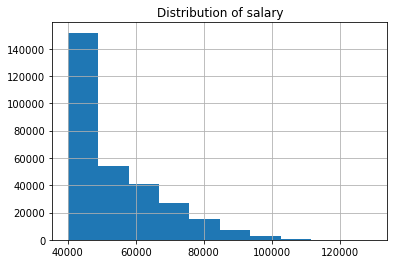

In [172]:
employee_salaries_df.hist(column='salary')
plt.title("Distribution of salary")
plt.savefig("images/Salary.png")
plt.show()

In [166]:

employees_grouped_by_title = employee_salaries_df.groupby(['title'])['salary'].mean()
employees_grouped_by_title

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

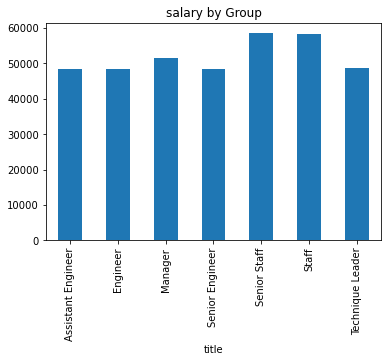

In [174]:
employees_grouped_by_title.plot.bar()
plt.title("salary by Group")
plt.savefig("images/Salary_by_group.png")
plt.show()